In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import torch

from sklearn.preprocessing import LabelEncoder

import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

## 데이터 전처리

In [41]:
df = pd.read_csv('dataset.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   switch-type                          1053 non-null   object 
 1   max-memory-inhibit                   1053 non-null   bool   
 2   max-sym-array-size                   1053 non-null   int64  
 3   max-depth                            1053 non-null   int64  
 4   watchdog                             1053 non-null   bool   
 5   max-static-fork-pct                  1053 non-null   float64
 6   const-array-opt                      1053 non-null   bool   
 7   zero-seed-extension                  1053 non-null   bool   
 8   smtlib-display-constants             1053 non-null   object 
 9   warnings-only-to-file                1053 non-null   bool   
 10  smtlib-human-readable                1053 non-null   bool   
 11  warn-all-external-symbols     

,switch-type,max-memory-inhibit,max-sym-array-size,max-depth,watchdog,max-static-fork-pct,const-array-opt,zero-seed-extension,smtlib-display-constants,warnings-only-to-file,...,cex-cache-superset,verify-each,max-memory,batch-time,max-static-solve-pct,max-static-cpfork-pct,max-static-cpsolve-pct,array-value-symb-ratio,sym-stdin,Coverage
0,internal,False,3980,1142,True,0.159269,True,False,bin,False,...,False,False,1136,4.0,0.392040,0.197067,0.029739,0.896605,4,0
1,llvm,True,6067,2189,True,0.798309,True,True,bin,False,...,False,True,2040,7.0,0.848477,0.372759,0.209427,0.780304,11,1850
2,llvm,False,3104,646,True,0.238140,True,False,dec,True,...,False,True,1098,4.0,0.922272,0.613608,0.533229,0.582163,4,2562
3,internal,False,5791,1579,False,0.641675,False,True,dec,False,...,False,False,1242,6.0,0.464663,0.849170,0.521843,0.401757,4,1296
4,internal,True,2356,537,True,0.893913,False,True,bin,True,...,True,True,711,4.0,0.538513,0.410924,0.766638,0.351363,8,1281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,simple,False,329279,181009,True,0.480900,False,False,bin,True,...,True,False,59068,8.0,0.926000,0.766700,0.604200,0.059100,19,1396
1049,simple,True,199941,1376,False,0.959500,False,False,hex,True,...,True,False,44955,4.0,0.377300,0.849700,0.431100,0.802000,50,1866
1050,simple,False,196349,153606,True,0.008200,True,False,dec,False,...,False,True,46454,4.0,0.844500,0.783000,0.138100,0.579200,29,1939
1051,internal,False,5548,2335,True,0.803200,True,False,dec,False,...,True,True,59204,44.0,0.178000,0.014700,0.957900,0.110700,16,1686


In [112]:


# LabelEncoder를 사용하여 문자열 변수를 숫자로 변환
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

boolean_columns = df.select_dtypes(include=['bool']).columns

for column in boolean_columns:
    df[column] = df[column].astype(int)

scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns 
numerical_columns = numerical_columns.drop('Coverage')
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# 입력 변수와 타겟 변수 분리
X = df.drop('Coverage', axis=1)
y = df['Coverage']

# 데이터를 train/val/test 세트로 분할 (비율: 7:2:1)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (757, 56) (757,)
Validation set shape: (190, 56) (190,)
Test set shape: (106, 56) (106,)


In [113]:
import torch

# DataFrame을 PyTorch 텐서로 변환
train_tensor_x = torch.tensor(X_train.values, dtype=torch.float32)
train_tensor_y = torch.tensor(y_train.values, dtype=torch.float32)

val_tensor_x = torch.tensor(X_val.values, dtype=torch.float32)
val_tensor_y = torch.tensor(y_val.values, dtype=torch.float32)

test_tensor_x = torch.tensor(X_test.values, dtype=torch.float32)
test_tensor_y = torch.tensor(y_test.values, dtype=torch.float32)

print("Train tensor shape:", train_tensor_x.shape, train_tensor_y.shape)
print("Validation tensor shape:", val_tensor_x.shape, val_tensor_y.shape)
print("Test tensor shape:", test_tensor_x.shape, test_tensor_y.shape)

Train tensor shape: torch.Size([757, 56]) torch.Size([757])
Validation tensor shape: torch.Size([190, 56]) torch.Size([190])
Test tensor shape: torch.Size([106, 56]) torch.Size([106])


## Baseline 모델 구성 및 학습

In [200]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
# 디바이스 설정: Mac에서 pytorch 사용
device = torch.device("mps")


batch_size = 128

# 타겟 데이터 로그 변환
train_log_y = np.log1p(train_tensor_y.numpy())
val_log_y = np.log1p(val_tensor_y.numpy())
test_log_y = np.log1p(test_tensor_y.numpy())


# TensorDataset 재생성
train_dataset = TensorDataset(train_tensor_x, torch.Tensor(train_log_y))
val_dataset = TensorDataset(val_tensor_x, torch.Tensor(val_log_y))
test_dataset = TensorDataset(test_tensor_x, torch.Tensor(test_log_y))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_prob=0.5):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = x.unsqueeze(1)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out)
        out = self.fc(out[:, -1, :])
        return out



def train_model(model, train_loader, val_loader, loss_fn, optimizer, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), targets)
            loss.backward()
            optimizer.step()
        # 검증 단계
        model.eval()
        with torch.no_grad():
            val_loss = 0
            val_predictions = []
            val_targets = []
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                val_loss += loss_fn(outputs.squeeze(), targets).item()
                val_predictions.extend(outputs.squeeze().cpu().numpy())
                val_targets.extend(targets.cpu().numpy())
            val_rmse = np.sqrt(mean_squared_error(val_targets, val_predictions))
            
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss / len(val_loader)}, Val RMSE: {val_rmse}')
        
# 모델 하이퍼파라미터
input_dim = 56
hidden_dim = 1024



output_dim = 1  
num_layers = 3
loss_fn = nn.L1Loss()
model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers, dropout_prob=0.3).to(device)



# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
# optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)



train_model(model, train_loader, val_loader, loss_fn, optimizer, num_epochs=20)



# 테스트 단계
model.eval()
with torch.no_grad():
    test_loss = 0
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        test_loss += loss_fn(outputs.squeeze(), targets).item()
        test_predictions.extend(outputs.squeeze().cpu().numpy())
        test_targets.extend(targets.cpu().numpy())
    test_mae = mean_absolute_error(test_targets, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
    
    print(f'Test Loss: {test_loss / len(test_loader)}')
    print(f'Test RMSE: {test_rmse}')
    
    





Epoch 1, Loss: 6.23806619644165, Val Loss: 6.6299729347229, Val RMSE: 6.930433750152588
Epoch 2, Loss: 6.445253849029541, Val Loss: 6.347437381744385, Val RMSE: 6.610644817352295
Epoch 3, Loss: 6.132755279541016, Val Loss: 5.983289480209351, Val RMSE: 6.200560569763184
Epoch 4, Loss: 5.316474437713623, Val Loss: 5.573638200759888, Val RMSE: 5.742596626281738
Epoch 5, Loss: 4.9692769050598145, Val Loss: 5.134425163269043, Val RMSE: 5.256545066833496
Epoch 6, Loss: 4.821556568145752, Val Loss: 4.67663049697876, Val RMSE: 4.7570366859436035
Epoch 7, Loss: 4.2399067878723145, Val Loss: 4.194228649139404, Val RMSE: 4.241316795349121
Epoch 8, Loss: 3.773324966430664, Val Loss: 3.6797198057174683, Val RMSE: 3.70837664604187
Epoch 9, Loss: 3.252567768096924, Val Loss: 3.1396301984786987, Val RMSE: 3.177555561065674
Epoch 10, Loss: 2.5461318492889404, Val Loss: 2.5686583518981934, Val RMSE: 2.6631598472595215
Epoch 11, Loss: 2.0820813179016113, Val Loss: 1.9611214995384216, Val RMSE: 2.20509696

In [168]:
# 테스트 단계
model.eval()
with torch.no_grad():
    test_loss = 0
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        test_loss += loss_fn(outputs.squeeze(), targets).item()
        test_predictions.extend(outputs.squeeze().cpu().numpy())
        test_targets.extend(targets.cpu().numpy())
    test_mae = mean_absolute_error(test_targets, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
    
    print(f'Test Loss: {test_loss / len(test_loader)}')
    print(f'Test MAE: {test_mae}, Test RMSE: {test_rmse}')
    
    

Test Loss: 6.697564125061035
Test MAE: 6.697564125061035, Test RMSE: 6.991405010223389


Epoch 1, Train Loss: 6.5647, Val Loss: 6.6185, Val MAE: 6.6754, Val RMSE: 6.9146
Epoch 2, Train Loss: 6.3677, Val Loss: 6.3348, Val MAE: 6.3870, Val RMSE: 6.5945
Epoch 3, Train Loss: 6.0512, Val Loss: 5.9764, Val MAE: 6.0227, Val RMSE: 6.1923
Epoch 4, Train Loss: 5.6878, Val Loss: 5.5702, Val MAE: 5.6096, Val RMSE: 5.7396
Epoch 5, Train Loss: 5.2799, Val Loss: 5.1383, Val MAE: 5.1706, Val RMSE: 5.2634
Epoch 6, Train Loss: 4.8522, Val Loss: 4.6916, Val MAE: 4.7165, Val RMSE: 4.7779
Epoch 7, Train Loss: 4.4108, Val Loss: 4.2210, Val MAE: 4.2380, Val RMSE: 4.2767
Epoch 8, Train Loss: 3.9399, Val Loss: 3.7306, Val MAE: 3.7396, Val RMSE: 3.7705
Epoch 9, Train Loss: 3.4528, Val Loss: 3.2200, Val MAE: 3.2208, Val RMSE: 3.2687
Epoch 10, Train Loss: 2.9526, Val Loss: 2.6933, Val MAE: 2.6860, Val RMSE: 2.7862
Epoch 11, Train Loss: 2.4222, Val Loss: 2.1513, Val MAE: 2.1316, Val RMSE: 2.3528
Epoch 12, Train Loss: 1.8951, Val Loss: 1.5787, Val MAE: 1.5431, Val RMSE: 2.0288
Epoch 13, Train Loss: 1.3

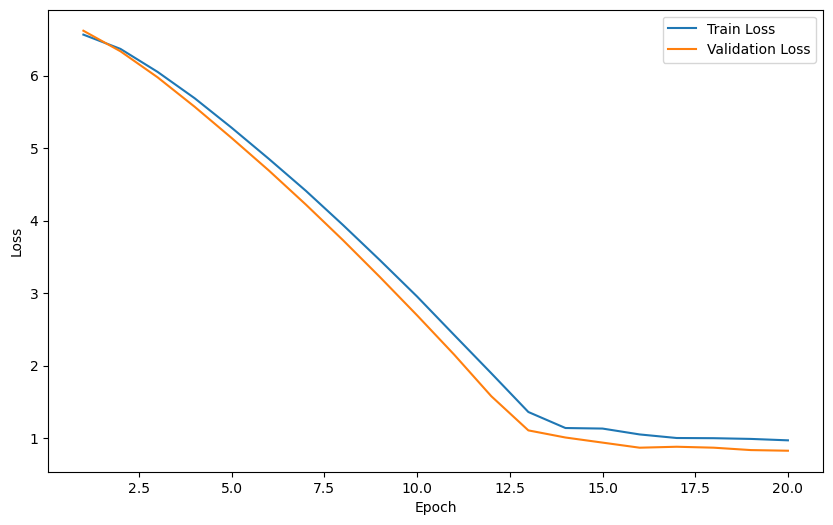

In [171]:
import matplotlib.pyplot as plt

def train_model(model, train_loader, val_loader, loss_fn, optimizer, num_epochs=100):
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        # 학습 단계
        model.train()
        train_loss = 0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), targets)
            train_loss += loss.item()
            loss.backward()
            optimizer.step()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        
        # 검증 단계
        model.eval()
        with torch.no_grad():
            val_loss = 0
            val_predictions = []
            val_targets = []
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                val_loss += loss_fn(outputs.squeeze(), targets).item()
                val_predictions.extend(outputs.squeeze().cpu().numpy())
                val_targets.extend(targets.cpu().numpy())
            val_loss /= len(val_loader)
            val_losses.append(val_loss)
            
            val_mae = mean_absolute_error(val_targets, val_predictions)
            val_rmse = np.sqrt(mean_squared_error(val_targets, val_predictions))
            
            print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}, Val RMSE: {val_rmse:.4f}')
    
    # 학습 곡선 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# 모델 학습
train_model(model, train_loader, val_loader, loss_fn, optimizer, num_epochs=20)


In [103]:
# 테스트 단계
model.eval()
with torch.no_grad():
    test_loss = 0
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        test_loss += loss_fn(outputs.squeeze(), targets).item()
        test_predictions.extend(outputs.squeeze().cpu().numpy())
        test_targets.extend(targets.cpu().numpy())
    test_mae = mean_absolute_error(test_targets, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
    
    print(f'Test Loss: {test_loss / len(test_loader)}')
    print(f'Test MAE: {test_mae}, Test RMSE: {test_rmse}')
    
    

Test Loss: 1.2225067615509033
Test MAE: 1.2225066423416138, Test RMSE: 2.176520824432373
